# Rock Moisture Deficit
***

*OR*

***
# The Breathing of Rocks
The idea behind this comes from transpiration of water by plants. The so-called vapor pressure deficit (VPD). Under conditions of stress the actual transpiration by plants is limited by the supply of water and thus the vapor pressure over the canopy is less than what it could be for the given temperature ($e_{sat}$).
Analogously a rock - regarded as being porous - should transpire water if there is a supply and while RH is low.
If RH approaches 100 then the RMD will be zero, or in other words, the moist surface continously evaporates to saturate the air. 

$$ RMD = vp_{sat} \times (1 - \frac {relative humidity}{100} ) $$

Ideally we would measure this condition on-site. However under good weather conditions with little wind we can assume that the RH measured by the weather station is similar to the RH present at the rock-air interface just a few meters below. Therefore I will try to select days with little wind and high irradiance (= good weather). 

To calculate $vp_{sat}$ I will use an approximation relying only on $T$ the *Buck* equation (source: https://en.wikipedia.org/wiki/Vapour_pressure_of_water).

$$ vp_{sat} = 0.61121 \exp \big( \big(18.678 - \frac{T}{234.5} \big ) \big ( \frac{T}{257.14+T} \big ) \big) $$

- $T$ in $°C$
- $P$ in $kPa$

This will make use of the weather station data and the rock_temperature near the surface of the MH10 and MH11 sensors. While MH10 is dominated by the solar energy, MH11 is dominated by the ambient air temperature.

Hopefully this approach will allow to explain the erratic behaviour of the RH time series at the Matterhorn. 
It will basically show that mountains such as the Matterhorn are remotely breathing.

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math

In [70]:
def vps(T):
    p = 0.61121 * math.pow(math.e, ((18.678-(T/234.5))*(T/(257.14+T))))
    return p               

In [71]:
df_MH10_resi = pd.read_csv("../../data/ts_data_all/MH10_resistivity_rock_2010.csv", parse_dates=['time'])
df_MH10_resi.set_index('time', inplace = True)

for y in range(2011,2019,1):
    df = pd.read_csv("../../data/ts_data_all/MH10_resistivity_rock_{}.csv".format(y), parse_dates=['time'])
    df.set_index('time', inplace = True)
    df_MH10_resi = pd.concat([df_MH10_resi, df],0)
    
df_MH10_resi.head()

,position [],device_id [],resistivity_10cm [Mohm],resistivity_35cm [Mohm],resistivity_60cm [Mohm],resistivity_85cm [Mohm],resistivity_10_35cm [Mohm],resistivity_35_60cm [Mohm],resistivity_60_85cm [Mohm],resistivity_10_60cm [Mohm],resistivity_35_85cm [Mohm],resistivity_10_85cm [Mohm],ref1 [°C],ref2 [°C],ref3 [°C],ref4 [°C],ref5 [°C]
time,,,,,,,,,,,,,,,,,
2010-01-01 00:00:00+00:00,10.0,2029.0,66.7823,87.8686,790.7161,4.4467,134.9737,482.7953,306.7508,293.1925,26.9683,16.1765,1.9745,-9.7302,1.0037,1.9708,-9.7314
2010-01-01 01:00:00+00:00,10.0,2029.0,69.7584,91.2204,789.7602,4.4288,140.0917,489.4952,303.2554,296.6778,27.7242,16.4991,1.9743,-9.7301,1.0037,1.9706,-9.7315
2010-01-01 02:00:00+00:00,10.0,2029.0,71.7071,94.5367,789.4522,4.4180,144.4233,496.6845,301.0353,299.5663,28.4646,16.7192,1.9742,-9.7302,1.0036,1.9706,-9.7315
2010-01-01 03:00:00+00:00,10.0,2029.0,73.6827,97.8983,791.6719,4.4121,149.1580,503.5944,300.2035,301.4875,29.2369,16.9175,1.9738,-9.7302,1.0035,1.9705,-9.7313
2010-01-01 04:00:00+00:00,10.0,2029.0,76.0433,101.1085,795.4953,4.4074,154.1705,509.5604,300.9823,304.6579,29.9644,17.1487,1.9738,-9.7303,1.0034,1.9704,-9.7319


In [72]:
df_MH10_temp = pd.read_csv("../../data/ts_data_all/MH10_temperature_rock_2010.csv", parse_dates=['time'])
df_MH10_temp.set_index('time', inplace = True)

for y in range(2011,2019,1):
    df = pd.read_csv("../../data/ts_data_all/MH10_temperature_rock_{}.csv".format(y), parse_dates=['time'])
    df.set_index('time', inplace = True)
    df_MH10_temp = pd.concat([df_MH10_temp, df],0)

df_MH10_temp.head()

,temperature_nearsurface_t2 [°C],device_id [],position [],ref1 [°C],ref2 [°C],ref3 [°C],ref4 [°C],ref5 [°C],temperature_10cm [°C],temperature_35cm [°C],temperature_60cm [°C],temperature_85cm [°C]
time,,,,,,,,,,,,
2010-01-01 00:00:00+00:00,-8.9537,2029.0,10.0,1.9745,-9.7302,1.0037,1.9708,-9.7314,-8.0363,-5.8373,-5.4728,-5.5966
2010-01-01 01:00:00+00:00,-9.0642,2029.0,10.0,1.9743,-9.7301,1.0037,1.9706,-9.7315,-8.2009,-6.0119,-5.5398,-5.6052
2010-01-01 02:00:00+00:00,-9.1236,2029.0,10.0,1.9742,-9.7302,1.0036,1.9706,-9.7315,-8.3090,-6.1709,-5.6098,-5.6190
2010-01-01 03:00:00+00:00,-9.2100,2029.0,10.0,1.9738,-9.7302,1.0035,1.9705,-9.7313,-8.4127,-6.3159,-5.6826,-5.6379
2010-01-01 04:00:00+00:00,-9.3749,2029.0,10.0,1.9738,-9.7303,1.0034,1.9704,-9.7319,-8.5459,-6.4478,-5.7568,-5.6614


In [73]:
df_MH10 = pd.concat([df_MH10_resi, df_MH10_temp],1)

In [74]:
df_MH11_resi = pd.read_csv("../../data/ts_data_all/MH11_resistivity_rock_2010.csv", parse_dates=['time'])
df_MH11_resi.set_index('time', inplace = True)

for y in range(2011,2019,1):
    df = pd.read_csv("../../data/ts_data_all/MH11_resistivity_rock_{}.csv".format(y), parse_dates=['time'])
    df.set_index('time', inplace = True)
    df_MH11_resi = pd.concat([df_MH11_resi, df],0)

df_MH11_resi.head()

,position [],device_id [],resistivity_10cm [Mohm],resistivity_35cm [Mohm],resistivity_60cm [Mohm],resistivity_85cm [Mohm],resistivity_10_35cm [Mohm],resistivity_35_60cm [Mohm],resistivity_60_85cm [Mohm],resistivity_10_60cm [Mohm],resistivity_35_85cm [Mohm],resistivity_10_85cm [Mohm],ref1 [°C],ref2 [°C],ref3 [°C],ref4 [°C],ref5 [°C]
time,,,,,,,,,,,,,,,,,
2010-01-01 00:00:00+00:00,11.0,2036.0,709.8505,656.7741,132.4087,14.8444,141.9851,23.4046,23.5426,560.404,194.5403,532.3330,1.8878,-9.7900,1.0,1.8838,-9.7915
2010-01-01 01:00:00+00:00,11.0,2036.0,710.1110,657.4908,132.4176,14.8466,142.0326,23.4123,23.5325,560.404,194.6810,532.3330,1.8876,-9.7901,1.0,1.8836,-9.7914
2010-01-01 02:00:00+00:00,11.0,2036.0,710.1110,658.1424,132.7118,14.8379,142.1360,23.3978,23.5042,560.404,194.7967,532.4776,1.8878,-9.7900,1.0,1.8840,-9.7915
2010-01-01 03:00:00+00:00,11.0,2036.0,710.1110,657.4908,132.7929,14.8310,142.1772,23.3999,23.4875,560.404,194.7776,532.6222,1.8877,-9.7900,1.0,1.8839,-9.7916
2010-01-01 04:00:00+00:00,11.0,2036.0,710.1110,658.1207,132.8086,14.8202,142.2094,23.3854,23.4644,560.404,194.8195,533.8270,1.8879,-9.7899,1.0,1.8840,-9.7915


In [75]:
df_MH11_temp = pd.read_csv("../../data/ts_data_all/MH11_temperature_rock_2010.csv", parse_dates=['time'])
df_MH11_temp.set_index('time', inplace = True)

for y in range(2011,2019,1):
    df = pd.read_csv("../../data/ts_data_all/MH11_temperature_rock_{}.csv".format(y), parse_dates=['time'])
    df.set_index('time', inplace = True)
    df_MH11_temp = pd.concat([df_MH11_temp, df],0)
    
df_MH11_temp.tail()

,temperature_nearsurface_t2 [°C],device_id [],position [],ref1 [°C],ref2 [°C],ref3 [°C],ref4 [°C],ref5 [°C],temperature_100cm [°C],temperature_10cm [°C],temperature_20cm [°C],temperature_30cm [°C],temperature_35cm [°C],temperature_50cm [°C],temperature_5cm [°C],temperature_60cm [°C],temperature_85cm [°C]
time,,,,,,,,,,,,,,,,,
2018-12-31 19:00:00+00:00,-8.1208,2056.0,11.0,1.9686,-9.6733,NaN,NaN,NaN,-7.7135,-8.4003,-8.4053,-8.3887,NaN,-8.3787,-8.3990,NaN,NaN
2018-12-31 20:00:00+00:00,-8.1664,2056.0,11.0,1.9687,-9.6733,NaN,NaN,NaN,-7.7130,-8.4151,-8.4116,-8.3875,NaN,-8.3668,-8.4160,NaN,NaN
2018-12-31 21:00:00+00:00,-8.2574,2056.0,11.0,1.9687,-9.6733,NaN,NaN,NaN,-7.7122,-8.4295,-8.4185,-8.3880,NaN,-8.3555,-8.4374,NaN,NaN
2018-12-31 22:00:00+00:00,-8.3511,2056.0,11.0,1.9686,-9.6733,NaN,NaN,NaN,-7.7108,-8.4543,-8.4280,-8.3895,NaN,-8.3450,-8.4738,NaN,NaN
2018-12-31 23:00:00+00:00,-8.3657,2056.0,11.0,1.9686,-9.6733,NaN,NaN,NaN,-7.7088,-8.4701,-8.4394,-8.3934,NaN,-8.3343,-8.4857,NaN,NaN


In [76]:
df_MH11 = pd.concat([df_MH11_resi, df_MH11_temp],1)

In [77]:
df_MH25 = pd.read_csv("../../data/ts_data_all/MH25_vaisalawxt520windpth_2010.csv", parse_dates=['time'])
df_MH25.set_index('time', inplace = True)

for y in range(2011,2019,1):
    df = pd.read_csv("../../data/ts_data_all/MH25_vaisalawxt520windpth_{}.csv".format(y), parse_dates=['time'])
    df.set_index('time', inplace = True)
    df_MH25 = pd.concat([df_MH25, df],0)
    
df_MH25.tail()

,position [],wind_direction_minimum [°],wind_direction_average [°],wind_direction_maximum [°],wind_speed_minimum [km/h],wind_speed_average [km/h],wind_speed_maximum [km/h],temp_air [°C],temp_internal [°C],relative_humidity [%RH],air_pressure [hPa]
time,,,,,,,,,,,
2018-11-08 02:00:00+00:00,25.0,0.0,161.8485,348.0,0.0,5.1242,19.1,-6.6182,-6.4273,89.4455,665.2485
2018-11-08 03:00:00+00:00,25.0,0.0,61.3548,309.0,0.0,1.7903,12.5,-6.7548,-6.5677,89.3839,665.4194
2018-11-08 04:00:00+00:00,25.0,0.0,67.8710,340.0,0.0,2.7774,17.7,-6.8161,-6.6581,89.3806,665.6419
2018-11-08 05:00:00+00:00,25.0,0.0,0.0000,0.0,0.0,0.0000,0.0,-6.8161,-6.6387,89.3452,665.7484
2018-11-08 06:00:00+00:00,25.0,0.0,0.0000,0.0,0.0,0.0000,0.0,-6.8000,-6.6000,89.5000,665.8000


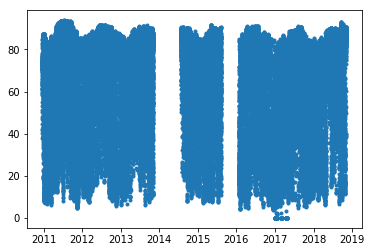

In [78]:
plt.plot(pd.to_datetime(df_MH25.index), df_MH25['relative_humidity [%RH]'], '.')

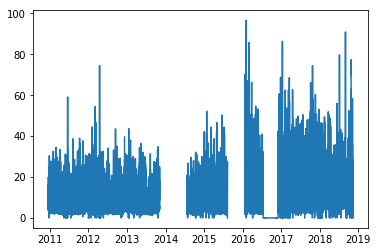

In [65]:
plt.plot(pd.to_datetime(df_MH25.index), df_MH25['wind_speed_average [km/h]'])

In [91]:
df_MH10 = df_MH10.fillna(0)
df_MH10['vp_sat'] = df_MH10['temperature_nearsurface_t2 [°C]'].apply(vps)

In [92]:
df_MH10.describe()

,position [],device_id [],resistivity_10cm [Mohm],resistivity_35cm [Mohm],resistivity_60cm [Mohm],resistivity_85cm [Mohm],resistivity_10_35cm [Mohm],resistivity_35_60cm [Mohm],resistivity_60_85cm [Mohm],resistivity_10_60cm [Mohm],...,ref2 [°C],ref3 [°C],ref4 [°C],ref5 [°C],temperature_10cm [°C],temperature_35cm [°C],temperature_60cm [°C],temperature_85cm [°C],VPS,vp_sat
count,78888.000000,78888.000000,78888.000000,78888.000000,78888.000000,78888.000000,78888.000000,78888.000000,78888.000000,78888.000000,...,78888.000000,78888.000000,78888.000000,78888.000000,78888.000000,78888.000000,78888.000000,78888.000000,78888.000000,78888.000000
mean,9.713138,2050.613224,38.491278,53.858479,210.495897,2.793836,54.955200,126.979605,206.009236,61.223661,...,-9.449780,0.973781,1.906369,-9.450866,2.468224,1.859676,1.242813,0.710507,39049.443223,0.843243
std,1.669242,353.787295,91.989436,104.150536,294.063976,1.475865,107.289764,210.170049,322.654502,104.234705,...,1.624045,0.167780,0.327904,1.624234,6.520669,5.045869,4.459275,4.144737,22996.362203,0.492820
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-9.886200,0.000000,0.000000,-9.765300,-18.263700,-13.835500,-11.337200,-9.964000,0.000000,0.118371
25%,10.000000,2090.000000,2.594000,5.327500,22.061150,1.991200,6.190775,13.529775,30.256600,11.386675,...,-9.739300,1.004000,1.951700,-9.740500,-1.758275,-1.361075,-1.855900,-2.358750,19124.750000,0.493560
50%,10.000000,2104.000000,5.632050,8.600100,36.106450,2.230500,10.850250,20.688850,60.035650,16.825050,...,-9.728700,1.005000,1.960900,-9.729700,2.443750,2.213250,1.556000,0.938650,39045.500000,0.713009
75%,10.000000,2141.000000,22.527525,47.366800,372.032575,3.364925,44.428225,130.512675,200.332275,62.394700,...,-9.718100,1.006100,1.970100,-9.719000,7.104950,5.602000,4.571950,3.858625,58966.250000,1.061688
max,10.000000,2141.000000,791.200900,920.652500,1783.550400,15.246700,873.300500,1808.293000,1881.353000,809.127000,...,0.000000,1.030000,2.387500,0.000000,22.150100,15.169700,11.811100,10.339400,78887.000000,3.711506


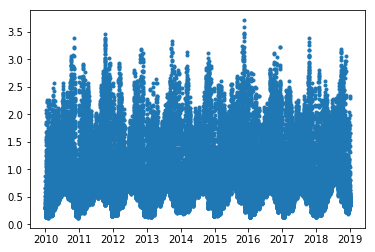

In [93]:
plt.plot(pd.to_datetime(df_MH10.index), df_MH10['vp_sat'], '.')

In [ ]:
vpd = []
for row in df_weather:
    vpd.append(vpd(df_weather['temp_air [°C]', row], df_weather['relative_humidity [%RH]', row]))
    
print(vpd)

$$e^{\frac {A}{T} + B + CT + DT^2 + ET^3 + F ln T}$$
$$ A = -1.044E^4 $$
$$ B = -11.29 $$
$$ C = -2.7E^{-2} $$
$$ D = 1.289E{-5} $$
$$ E = -2.478E{-9} $$
$$ F = 6.456 $$
$$ T \left [ R \right ] = T \left [ ° F \right ] + 459.67 $$